In [155]:
#Импортируем нужные библиотеки

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
cwd = os.getcwd()
print(cwd)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [156]:
#Читаем данные

ht = pd.read_csv('drive/MyDrive/ДЗ Иннополис/howpop_train.csv')

**Задание 1.1**

In [63]:
#Выведем первые 5 строк

ht.head(5)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356


In [44]:
#Основная информация о числе непустых значений в столбцах и их типах в таблице

ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   url               134137 non-null  object 
 1   domain            134137 non-null  object 
 2   post_id           134137 non-null  int64  
 3   published         134137 non-null  object 
 4   author            97657 non-null   object 
 5   flow              97048 non-null   object 
 6   polling           134137 non-null  bool   
 7   content_len       134137 non-null  int64  
 8   title             134137 non-null  object 
 9   comments          134137 non-null  int64  
 10  favs              134137 non-null  int64  
 11  views             134137 non-null  int64  
 12  votes_plus        133566 non-null  float64
 13  votes_minus       133566 non-null  float64
 14  views_lognorm     134137 non-null  float64
 15  favs_lognorm      134137 non-null  float64
 16  comments_lognorm  13

Файл *howpop_train.csv* является объектом *DataFrame*, проще говоря - таблицей. Данный *DataFrame* содержит 4 типа данных: логические данные (*True/False*) (1), числа с плавающей запятой 64-битного разряда (5), 64-разрядное целые числа со знаком (5), объекты (*series*) (6). Здесь есть все базовые компоненты: данные, индексы (134137), столбцы (17).

In [75]:
#Сумма непустых значений

ht.isnull().sum()

,0
url,0
domain,0
post_id,0
published,0
author,36480
flow,37089
polling,0
content_len,0
title,0
comments,0


Здесь мы видим, что в 4 из 17 столбцов есть пустые строки (*author, flow, votes_plus, votes_minus*).

In [76]:
#Основная статистическая информация о столбцах

ht.describe(include='object')

,url,domain,published,author,flow,title
count,134137,134137,134137,97657,97048,134137
unique,134137,2,130291,22077,6,133628
top,https://habrahabr.ru/post/18284/,habrahabr.ru,2011-06-14 15:52:00,@alizar,develop,"Интересные события, произошедшие в выходные"
freq,1,97048,39,5292,53318,56


Здесь мы анализируем объекты *Series*. Их количество, уникальность, самый популярный объект и сколько раз он повторяется.

In [77]:
#Размерность таблицы

ht.shape

(134137, 17)

В таблице 134137 строк и 17 столбцов.

**Задание 1.2**

In [78]:
ht.isnull().sum()

,0
url,0
domain,0
post_id,0
published,0
author,36480
flow,37089
polling,0
content_len,0
title,0
comments,0


Eсть пропуски в 4ех столбцах: "*author*", "*flow*", "*votes_plus*", "*votes_minus*". Поступим следующим образом: удалим строки, где есть пропуск в столбцах с *author* и *flow*. Пропуски в столбце с *votes_plus* и *votes_minus* заполним медианным значением.

In [157]:
ht = ht.dropna(subset=['author', 'flow'])
ht['votes_plus'] = ht['votes_plus'].fillna(ht['votes_plus'].median())
ht['votes_minus'] = ht['votes_minus'].fillna(ht['votes_minus'].median())

<ipython-input-157-94f8d0165204>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ht['votes_plus'] = ht['votes_plus'].fillna(ht['votes_plus'].median())
<ipython-input-157-94f8d0165204>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ht['votes_minus'] = ht['votes_minus'].fillna(ht['votes_minus'].median())


In [80]:
ht.isnull().sum()

,0
url,0
domain,0
post_id,0
published,0
author,0
flow,0
polling,0
content_len,0
title,0
comments,0


In [81]:
ht.describe()

,post_id,content_len,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
count,65331.000000,65331.000000,65331.00000,65331.000000,6.533100e+04,65331.000000,65331.000000,65331.000000,65331.000000,65331.000000
mean,167452.375350,7964.322159,40.48617,93.983362,1.772662e+04,39.190782,8.545667,0.020277,0.154110,0.118331
std,81667.262441,9291.710791,60.74362,172.855925,3.593894e+04,44.700162,11.552621,1.012516,0.976775,0.958569
min,18284.000000,1.000000,0.00000,0.000000,1.300000e+01,0.000000,0.000000,-4.638018,-4.116975,-3.062439
25%,107028.500000,2302.000000,8.00000,12.000000,1.700000e+03,11.000000,2.000000,-0.734014,-0.508513,-0.474585
50%,153617.000000,5406.000000,21.00000,42.000000,6.900000e+03,25.000000,5.000000,-0.022143,0.222414,0.184418
75%,239639.000000,10359.000000,49.00000,108.000000,1.940000e+04,50.000000,11.000000,0.719293,0.855821,0.775733
max,314088.000000,309474.000000,1729.00000,8718.000000,1.730000e+06,1190.000000,258.000000,4.463234,3.836958,3.900973


**Задание 1.3**

Я хочу преобразовать данные так, чтобы осталась только дата (без времени) публикации.

In [94]:
ht['published'].to_list()[:5]

['2008-01-01 18:19:00',
 '2008-01-01 18:30:00',
 '2008-01-01 18:34:00',
 '2008-01-02 01:32:00',
 '2008-01-02 16:14:00']

In [95]:
s = '2008-01-14 10:33:00'
s.split()[0]

'2008-01-14'

In [158]:
def time(x):
  x = x.split()
  if x[1] != None:
    return ' '.join(x[:1])

ht['published'] = ht['published'].apply(time)

In [118]:
ht.head(5)

,post_id,content_len,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,18284,4305,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,18285,7344,1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,18286,8431,47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,18291,5662,102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
5,18295,3171,22,1,192,9.0,2.0,-0.950075,-0.825149,0.016555


Таким образом, я разделила с помощью *.split* дату и время и задала код, чтобы при обнаружении 2 слова (времени), он возвращал значение 1 слова (даты).

**Задание 1.4**

In [97]:
import statistics

In [98]:
s1 = statistics.mean(ht.views)
s2 = statistics.median(ht.views)
s3 = statistics.median_low(ht.views)
s4 = statistics.median_high(ht.views)
s5 = statistics.mode(ht.views)

print('Получились следующие значения: ', s1, s2, s3, s4, s5)

Получились следующие значения:  17726.61551177848 6900 6900 6900 1200


In [105]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

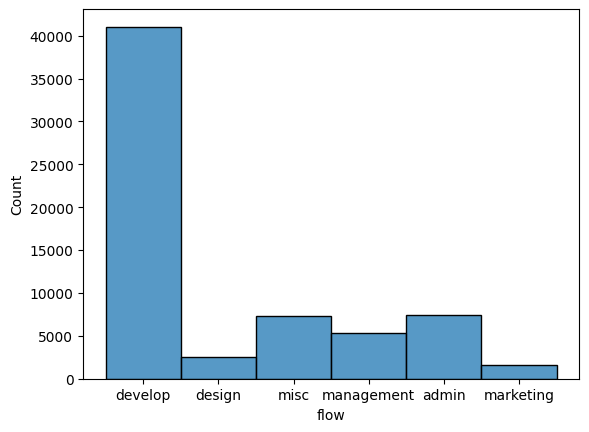

In [122]:
sns.histplot(data=ht, x='flow');

Вывод: выше мы видим гистограмму, на которой ясно, что больше всего активности на постах (свыше 10к просмотров и 100 комментариев) набирают разработчики.

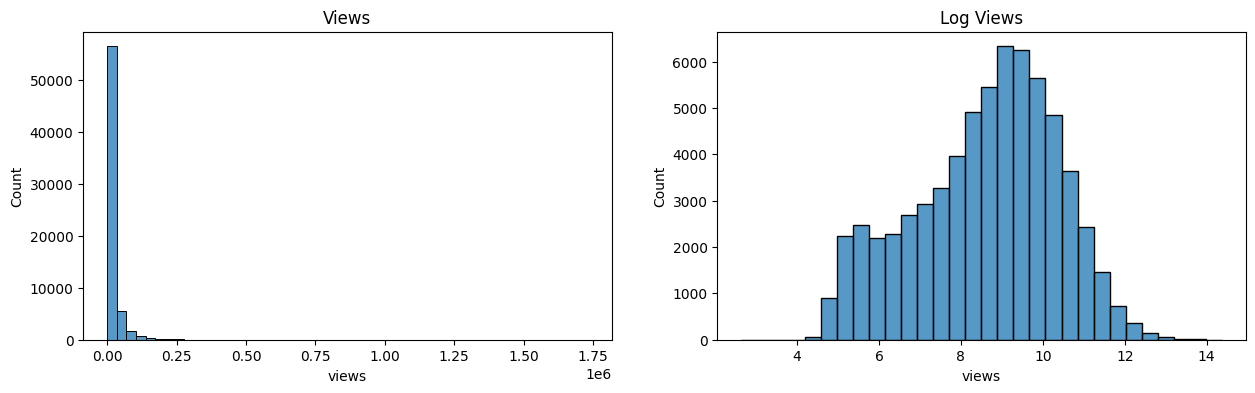

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(ht['views'], bins=50, ax=axes[0])
histplot.set_title('Views');

#гистограмма в логарифмическом масштабе
views= np.log(ht['views'] + 1)
histplot = sns.histplot(views, bins=30, ax=axes[1])
histplot.set_title('Log Views');

*Логарифмический масштаб (шкала)* — шкала, длина отрезка которой пропорциональна логарифму отношения величин, отмеченных на концах этого отрезка, в то время как на шкале в линейном масштабе длина отрезка пропорциональна разности величин на его концах.

Логарифмическая шкала исключительно удобна для отображения очень больших диапазонов значений величин.

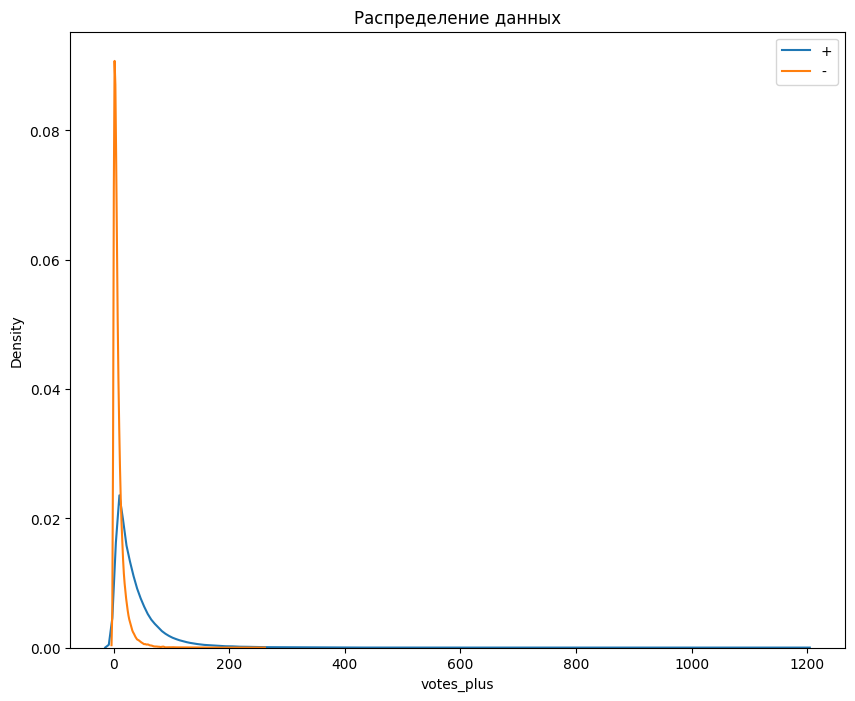

In [94]:
fig, (ax0) = plt.subplots(ncols=1, figsize=(10, 8))
ax0.set_title('Распределение данных')

sns.kdeplot(ht['votes_plus'], ax=ax0, label ='+')
sns.kdeplot(ht['votes_minus'], ax=ax0, label ='-')

plt.legend()

In [ ]:
print(max(ht.votes_plus))
print(max(ht.votes_minus))

1466.0
445.0


Здесь можно заметить, что положительных голосов гораздо больше, чем отрицательных.

**Задание 2.1**

In [123]:
from sklearn import preprocessing

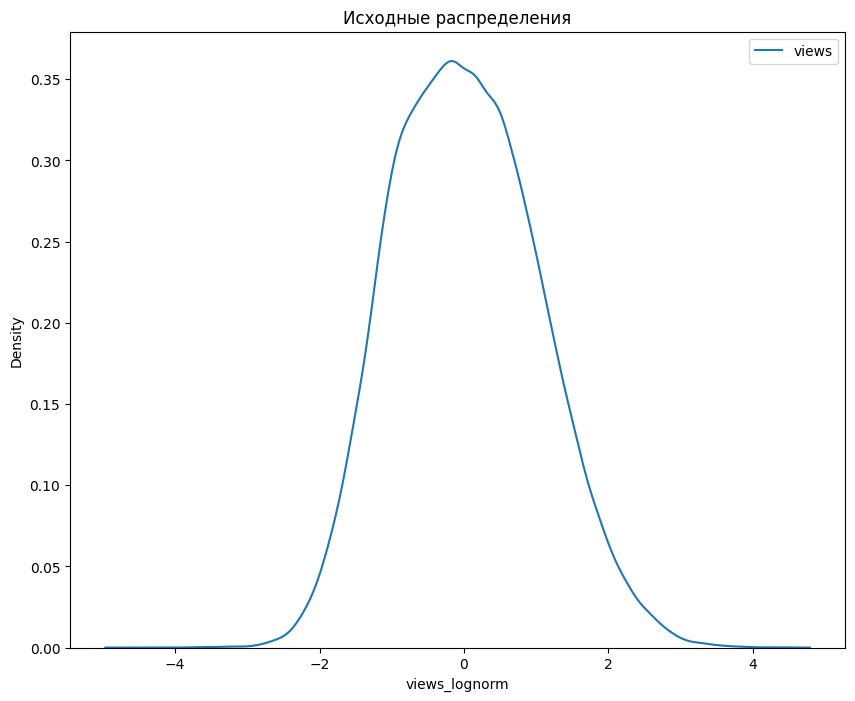

In [151]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(ht['views_lognorm'], ax=ax1, label ='views')
plt.legend()

In [130]:
ht.describe()

,post_id,content_len,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
count,65331.000000,65331.000000,65331.00000,65331.000000,6.533100e+04,65331.000000,65331.000000,65331.000000,65331.000000,65331.000000
mean,167452.375350,7964.322159,40.48617,93.983362,1.772662e+04,39.190782,8.545667,0.020277,0.154110,0.118331
std,81667.262441,9291.710791,60.74362,172.855925,3.593894e+04,44.700162,11.552621,1.012516,0.976775,0.958569
min,18284.000000,1.000000,0.00000,0.000000,1.300000e+01,0.000000,0.000000,-4.638018,-4.116975,-3.062439
25%,107028.500000,2302.000000,8.00000,12.000000,1.700000e+03,11.000000,2.000000,-0.734014,-0.508513,-0.474585
50%,153617.000000,5406.000000,21.00000,42.000000,6.900000e+03,25.000000,5.000000,-0.022143,0.222414,0.184418
75%,239639.000000,10359.000000,49.00000,108.000000,1.940000e+04,50.000000,11.000000,0.719293,0.855821,0.775733
max,314088.000000,309474.000000,1729.00000,8718.000000,1.730000e+06,1190.000000,258.000000,4.463234,3.836958,3.900973


In [128]:
from sklearn.preprocessing import MinMaxScaler

In [149]:
ht_mm = (ht['views_lognorm'] - ht['views_lognorm'].min()) / (ht['views_lognorm']. max() - ht['views_lognorm'].min())
ht_mm.describe()

,views_lognorm
count,65331.000000
mean,0.511830
std,0.111250
min,0.000000
25%,0.428952
50%,0.507169
75%,0.588634
max,1.000000


<Axes: title={'center': 'После нормализации MinMaxScaler'}, xlabel='views_lognorm', ylabel='Density'>

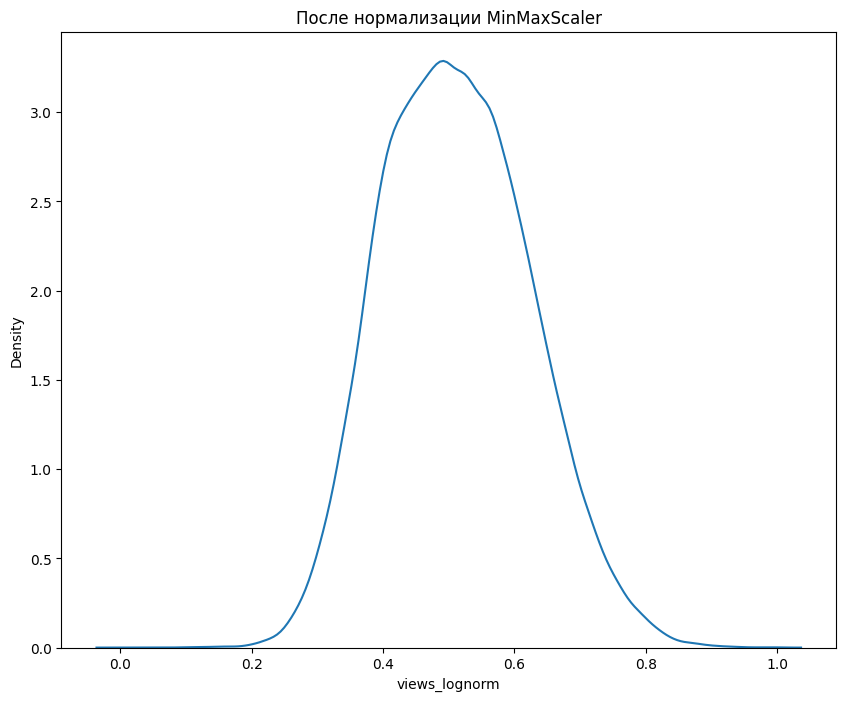

In [152]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(ht_mm, ax=ax1, label = 'views_lognorm')

Теперь логарифмические просмотры примерно в пределах [0, 1], а не [-4, 4]

> Метод ручного поиска и здравого смысла



In [9]:
ht['content_len'].describe()

,content_len
count,65331.000000
mean,7964.322159
std,9291.710791
min,1.000000
25%,2302.000000
50%,5406.000000
75%,10359.000000
max,309474.000000


Здесь мы видим, что в столбце "длина контента" есть строка min, которая передает данные о минимальной длине контента. Я считаю, контент длиной в 1 буквы не совсем уместен, давайте посмотрим, сколько существует подобных постов.

In [24]:
outliers = ht[ht['content_len'] <= 1]
outliers.shape[0]

753

In [28]:
cleaned = ht.drop(outliers.index, axis=0)
print('Результирующее число записей:', [cleaned.shape[0]])

Результирующее число записей: [64578]


Т. е. мы удалили записи, в которых длина написанного текста <= 1.

In [31]:
outliers = ht[ht['views'] <= (ht['votes_plus'] + ht['votes_minus'])]
outliers.shape[0]

35

In [32]:
cleaned = ht.drop(outliers.index, axis=0)
print('Результирующее число записей:', [cleaned.shape[0]])

Результирующее число записей: [65296]


Т.е. мы удалили записи, где число лайков и дизлайков превышает кол-во просмотров.

**Задание 2.2**

Метод MinMaxScaler выглядел для меня удобнее остальных методов нормализации. Тем более я избавила наш датафрейм от выбросов и аномалий.

Я выбрала проверку вручную, т.к. мне показалось это самым подходящим методом. Я быстрее стравилась с анализом, чем если бы использовала более сложные тесты.

**Задание 3.1**

Выдвинете гипотезу(минимум 2), проверьте ее, не забывая объясняя свой выбор

* Нулевая гипотеза: Длина контента и количество положительных голосов никак не связаны.

In [167]:
ht[['content_len', 'votes_plus']].corr()

,content_len,votes_plus
content_len,1.000000,0.047944
votes_plus,0.047944,1.000000


Гипотеза подтвердилась, коэфф. корреляции близится к 0, соответственно, эти две переменные никак не связаны друг с другом, что бывает редко.

* Альтернативная гипотеза: чем больше просмотров, тем больше добавленных в "нравится".

In [168]:
ht[['views', 'favs']].corr()

,views,favs
views,1.000000,0.641209
favs,0.641209,1.000000


Теснота связи - заметная. Значит, эти две переменные зависят друг от друга.